# Лабораторная работа 1. Работа с библиотекой Numpy

Ф.И.О.: Лаптев Александр Владимирович

In [190]:
# импортируем необходимые библиотеки и функции
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e в формате svg
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

**Задание 1.** Создайте одномерный вектор `a` целых значений от $l_1$ до $l_2$ включительно. На его основе вычислите следующие вектора и матрицы (размер вектора равен $n = l_2 - l_1 + 1$):

* одномерный вектор длины $n$, состоящий из элементов `a`, расположенных в обратном порядке;
* одномерный вектор длины $n$, состоящий из значений 0 и 1, в котором значение 1 соотвествует элементам, делящимся на 3 в исходном векторе `a`;
* двумерную матрицу-строку размера 1 на $n$, содержащую элементы вектора `a`;
* двумерную матрицу-столбец размера $n$ на 1, содержащую элементы вектора `a`;
* двумерную матрицу размера $n$ на $n$, содержащую все попарные произведения элементов вектора `a`;
* двумерную матрицу размера $n+2$ на $n+2$, основанную на матрице из предыдущего пункта и дополненную "бордюром" из нулей, окружающим ненулевые значения;
* двумерную матрицу размера $n$ на $n$, содержащую элементы вектора `a` на побочной диагонали;
* двумерную матрицу размера $n$ на 3, содержащую повторяющиеся значения из вектора `a` в её столбцах;
* двумерную матрицу размера 5 на $n$, содержащую повторяющиеся значения из вектора `a` в её строках.

Каждый из пунктов должен выводить на экран соответствующее значение.

In [201]:
# ваш код здесь
l1, l2 = 1, 10
n = l2 - l1 + 1
# Исходный вектор
a = np.arange(l1, l2 + 1, 1)
print("Исходный вектор:\n", a, a.shape)
# Первый пункт
b = np.flip(a)
print("Первый пункт:\n", b, b.shape)
# Второй пункт
c = (a % 3 == 0).astype(int)
print("Второй пункт:\n", c, c.shape)
# Третий пункт
d = np.reshape(a, (1, n))
print("Третий пункт:\n", d, d.shape)
# Четвертый пункт
e = np.reshape(a, (n, 1))
print("Четвертый пункт:\n", e, e.shape)
# Пятый пункт
#f = d * e
f = e @ d
print("Пятый пункт:\n", f, f.shape)
# Шестой пункт np.pad!
g = np.insert(np.insert(np.insert(np.insert(f, n, [0], axis=0), 0, [
              0], axis=0), n, [0], axis=1), 0, [0], axis=1)
print("Шестой пункт:\n", g, g.shape)
# Седьмой пункт
h = np.rot90(np.diag(a))
print("Седьмой пункт:\n", h, h.shape)
# Восьмой пункт
i = np.tile(e, 3)
print("Восьмой пункт:\n", i, i.shape)
# Девятый пункт
j = np.tile(d, (5, 1))
print("Девятый пункт:\n", j, j.shape)

Исходный вектор:
 [ 1  2  3  4  5  6  7  8  9 10] (10,)
Первый пункт:
 [10  9  8  7  6  5  4  3  2  1] (10,)
Второй пункт:
 [0 0 1 0 0 1 0 0 1 0] (10,)
Третий пункт:
 [[ 1  2  3  4  5  6  7  8  9 10]] (1, 10)
Четвертый пункт:
 [[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]] (10, 1)
Пятый пункт:
 [[  1   2   3   4   5   6   7   8   9  10]
 [  2   4   6   8  10  12  14  16  18  20]
 [  3   6   9  12  15  18  21  24  27  30]
 [  4   8  12  16  20  24  28  32  36  40]
 [  5  10  15  20  25  30  35  40  45  50]
 [  6  12  18  24  30  36  42  48  54  60]
 [  7  14  21  28  35  42  49  56  63  70]
 [  8  16  24  32  40  48  56  64  72  80]
 [  9  18  27  36  45  54  63  72  81  90]
 [ 10  20  30  40  50  60  70  80  90 100]] (10, 10)
Шестой пункт:
 [[  0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   2   3   4   5   6   7   8   9  10   0]
 [  0   2   4   6   8  10  12  14  16  18  20   0]
 [  0   3   6   9  12  15  18  21  24  27  30   0]
 [  0   4   8  12  16  20  24  

**Задание 2.** Создайте двумерную матрицу `X` размера $n$ на $m$, содержащую случайные величины, распределенные нормально (по гауссовому распределению) со средним $\mu = 0$ и и среднеквадратичным отклонением $\sigma = 1$. Используйте для этого генератор из модуля `numpy.random`. Сделайте следующее:

* Вычислите двумерную матрицу размера $n$ на $m$, в которой все отрицательные значения заменены на 0;
* Вычислите двумерную матрицу `Y` размера $n$ на $m$, каждый элемент которой вычисляется следующим образом: $y_{ij} = sin(x_{ij}) + cos(x_{ji})$;
* Предложите не менее четырех способов выделения целочисленной части из значений матрицы `X`;
* Вычислите двумерную матрицу размера $n$ на 3, содержащую в первом столбце суммы элементов, во втором столбце средние значения, а в третьем столбце среднеквадратичные отклонения для каждой строки матрицы `X`.

In [192]:
# ваш код здесь
n, m = 5, 6
# Исходная матрица
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=(n, m)).reshape(n, m)
print("Исходная матрица:\n", X, X.shape)
# 1 пункт
A = np.copy(X)
replace = A < 0
A[replace] = 0
print("1 пункт:\n", A, A.shape)
# 2 пункт
Y = np.sin(X) + np.cos(X)
print("2 пункт", Y, Y.shape)
# 3 пункт
print("3 пункт")
B = np.trunc(X)
print(B, B.shape)
B = np.fix(X)
print(B, B.shape)
B = X.astype(int)
print(B, B.shape)
B = np.vectorize(int)(X)
print(B, B.shape)
# 4 пункт
C = np.array([np.sum(X, axis=1), np.average(
    X, axis=1),  np.std(X, axis=1)]).reshape(n, 3)
print("4 пункт:\n", C, C.shape)

Исходная матрица:
 [[ 0.10492156  0.88388466  0.27548049  1.14981027 -0.52635902  0.90505062]
 [ 0.36103484  0.82909741 -1.44828167  0.72044659  0.46488494 -0.8838699 ]
 [-1.44107123  1.7467007   0.56668574 -1.28878797  0.39743987 -0.62372661]
 [-0.03407748 -1.30009946  0.57126926 -1.2950701  -0.61888841  1.20784836]
 [ 0.42680344  0.20267082  0.31951666  0.1954011   0.49344185  0.14576812]] (5, 6)
1 пункт:
 [[0.10492156 0.88388466 0.27548049 1.14981027 0.         0.90505062]
 [0.36103484 0.82909741 0.         0.72044659 0.46488494 0.        ]
 [0.         1.7467007  0.56668574 0.         0.39743987 0.        ]
 [0.         0.         0.57126926 0.         0.         1.20784836]
 [0.42680344 0.20267082 0.31951666 0.1954011  0.49344185 0.14576812]] (5, 6)
2 пункт [[ 1.09922994  1.40736046  1.23430395  1.32134703  0.36225345  1.40410219]
 [ 1.28877432  1.41286347 -0.87029606  1.41123154  1.34219311 -0.13903511]
 [-0.86223593  0.80957005  1.38052364 -0.68221325  1.30911397  0.2276434 ]
 [

**Задание 3.** Постройте вектор размера $n$ элементов, заполненный случайными нормально распределенными числами, распределенными со средним равным $\mu$ и среднеквадратичным отклонением $\sigma$. Постройте гистограмму эмпирического распределения при помощи функции `matplotlib.pyplot.hist`. Приведите аргументы, касающиеся выбора оптимального числа карманов (`bins`) при построении гистограммы.

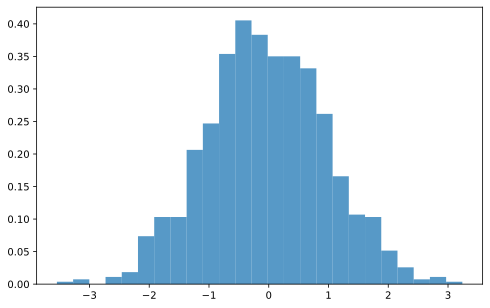

'\n1. Чем больше выборка, тем больше карманов может потребоваться для более детальной визуализации\nраспределения.\n2. Если в данных есть пики или особенности, то может потребоваться большее количество карманов\nдля их отображения.\n3. Если нужно просто получить общее представление о распределении, то можно использовать меньшее\nколичество карманов, если же требуется более детальное изучение, то нужно выбрать большее количество\nкарманов.\n4. Если важна точность визуализации, то надо выбрать большее количество карманов для более точного\nпредставления распределения.\n\nЧаще всегоодним из ключевых параметров является именно размер выборки.\n'

In [193]:
# ваш код здесь
# Исходный вектор
n = 1000
mu, sigma = 0, 1
x = np.random.default_rng().normal(mu, sigma, size=n)
plt.hist(x, bins='auto', density=True, alpha=0.75)
plt.show()
"""
1. Чем больше выборка, тем больше карманов может потребоваться для более детальной визуализации
распределения.
2. Если в данных есть пики или особенности, то может потребоваться большее количество карманов
для их отображения.
3. Если нужно просто получить общее представление о распределении, то можно использовать меньшее
количество карманов, если же требуется более детальное изучение, то нужно выбрать большее количество
карманов.
4. Если важна точность визуализации, то надо выбрать большее количество карманов для более точного
представления распределения.

Чаще всегоодним из ключевых параметров является именно размер выборки.
"""

**Задание 4.** Вычислите так называемую случайную матрицу Вигнера $W$ размера $n \times n$. Для этого вычислите случайную матрицу $X$ из нормально распределенных чисел (размера $n$ на $n$, $\mu=0$, $\sigma=1$). Матрица $W$ определяется формулой: $$ \frac {(X + X^T)}{\sqrt{2n}}.$$ Вычислите среднее значение и среднеквадратичное отклонение элементов полученной матрицы $W$. 

In [194]:
# ваш код здесь
n = 6
mu, sigma = 0, 1
X = np.random.default_rng().normal(mu, sigma, size=(n, n)).reshape(n, n)
print("Исходная матрица:\n", X, X.shape)
W = (X + np.transpose(X)) / np.sqrt(2 * n)
print("Winger`s matrix:\n", W, W.shape)
print(f"Average W = {np.average(W)}\nSigma W = {np.std(W)}")

Исходная матрица:
 [[ 1.24959255 -0.03399459  0.05020314  0.51480388 -1.01651294  0.80602458]
 [-0.47324184 -0.44414817  0.91388924 -0.96267417 -1.29178626  1.38124456]
 [ 0.04555139  0.62065622 -0.82533801 -0.48473706 -1.71923445  0.72965885]
 [-0.67592227 -0.00921391  1.63342948  0.71990501  0.64005804  2.96797484]
 [-2.69436879  0.09222985 -0.4522695   0.18935392 -1.34658117  1.29103884]
 [ 0.98188271  1.90962949 -0.7575901  -0.65312739 -0.29082193  0.3965182 ]] (6, 6)
Winger`s matrix:
 [[ 0.7214526  -0.14642654  0.02764195 -0.04651087 -1.07123928  0.51612438]
 [-0.14642654 -0.25642906  0.44298512 -0.28055992 -0.34628211  0.94999351]
 [ 0.02764195  0.44298512 -0.47650912  0.33159894 -0.62685919 -0.00806306]
 [-0.04651087 -0.28055992  0.33159894  0.41563735  0.23943061  0.6682389 ]
 [-1.07123928 -0.34628211 -0.62685919  0.23943061 -0.777449    0.28873775]
 [ 0.51612438  0.94999351 -0.00806306  0.6682389   0.28873775  0.22892989]] (6, 6)
Average W = 0.048145916402318654
Sigma W = 0.50

**Задание 5.** Повторите 1000 раз следующий эксперимент: сгенерируйте две матрицы размера $n \times n$ из стандартного нормального распределения, перемножьте их (обычным матричным умножением) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 25- и 75-процентные квантили? Постройте в виде гистограммы распределение максимальных элементов. Для вычисления квантили воспользуйтесь функцией `np.percentile`

Average value for test = 5.520671591949682
25-percentile = 4.197248234693557
75-percentile = 6.5211332098528985


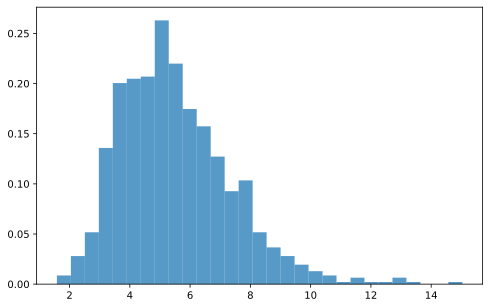

In [195]:
# ваш код здесь
n = 6
mu, sigma = 0, 1
max_values = []
for i in range(1000):
    A = np.random.default_rng().normal(mu, sigma, size=(n, n))
    B = np.random.default_rng().normal(mu, sigma, size=(n, n))
    max_values.append(np.max(np.dot(A, B)))
print(f"Average value for test = {np.average(max_values)}")
print(
    f"25-percentile = {np.percentile(max_values, 25)}\n75-percentile = {np.percentile(max_values, 75)}")
plt.hist(max_values, bins='auto', density=True, alpha=0.75)
plt.show()

**Задание 6.** Сгенерируйте $n$ чисел из распределения Пуассона с параметром $\lambda$. Сформируйте массив, в котором в i-м элементе будет записано количество сгенерированных чисел, равных i. Постройте гистограмму эмпирического распределения. Реализуйте функцию, которая принимает на вход numpy-массив целых чисел a (подобный полученному), и генерирует массив, в котором число i встречается a[i] раз.

**Подсказка:** обратите внимание на функции `np.bincount` и `np.repeat`

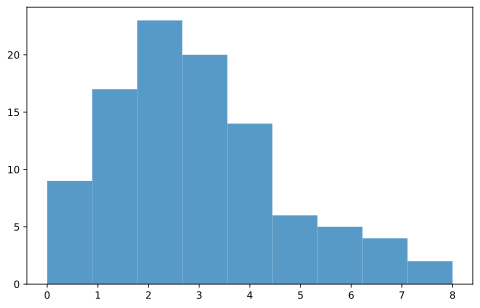

Repeat array:
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 6 6 6 6 6 7 7 7 7 8 8]


In [196]:
# ваш код здесь
def generate_array_with_repeat(a):
    """Функция для повторения элементов массива"""
    return np.repeat(np.arange(len(a)), a)


n = 100
Lambda = 3
# Генерация n чисел по распределению Пуассона
x = np.random.poisson(Lambda, n)
# Частота встречаемости
Y = np.bincount(x)
# Гистограмма
plt.hist(x, len(Y), alpha=0.75)
plt.show()
repeat_array = generate_array_with_repeat(Y)
print(f"Repeat array:\n{repeat_array}")

**Задание 7.** Напишите функцию `scale(X)`, которая принимает на вход двумерную матрицу произвольного размера и масштабирует каждый ее столбец (вычитает среднее и делит полученные значения на стандартное отклонение, вычисленные для всех элементов данного столбца). Учтите случай деления на нулевое значение (добавьте к стандартному отклонению малую константу порядка $10^{-6}$). Загрузите и перемасштабируйте таблицу с векторами признаков из встроенного набора `"Wine recognition dataset"` [https://scikit-learn.org/stable/datasets/toy_dataset.html#wine-dataset ]

In [197]:
# ваш код здесь
def scale(X):
    X_scaled = (X - np.average(X, axis=0)) / (np.std(X, axis=0) + 1e-6)
    return X_scaled


X = datasets.load_wine()["data"]
print(f"Результат масштабирования:\n{scale(X)}")

Результат масштабирования:
[[ 1.51861067 -0.56224929  0.23205169 ...  0.36217569  1.84791696
   1.01300892]
 [ 0.24628932 -0.49941293 -0.8279933  ...  0.40604888  1.11344773
   0.96524152]
 [ 0.19687879  0.02123123  1.1093303  ...  0.31830249  0.78858634
   1.39514817]
 ...
 [ 0.33275776  1.74474292 -0.38935399 ... -1.61211807 -1.48544338
   0.28057537]
 [ 0.20923142  0.22769357  0.01273204 ... -1.56824488 -1.40069693
   0.29649783]
 [ 1.39508432  1.5831637   1.36520323 ... -1.52437168 -1.42894575
  -0.59516041]]


**Задание 8.** Постройте в виде набора `scatter`-графиков различные пары признаков из отнормированных данных предыдущего задания. Обратите внимание, что набор данных `"Wine recognition dataset"` представляет собой словарь. Найдите в нём названия признаков объектов и разметку объектов по меткам классов и используйте их для оформления графиков. Какие из полученных графиков по вашему мнению наиболее информативны? Почему?

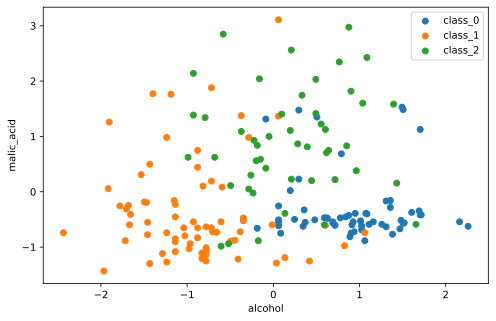

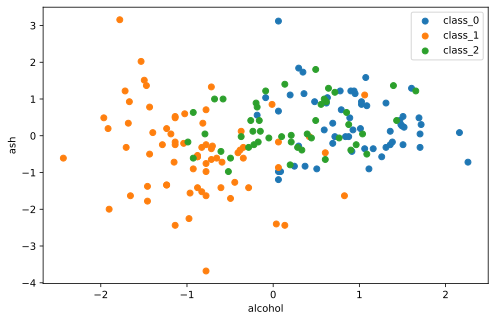

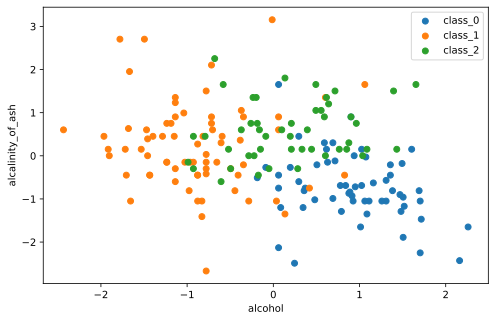

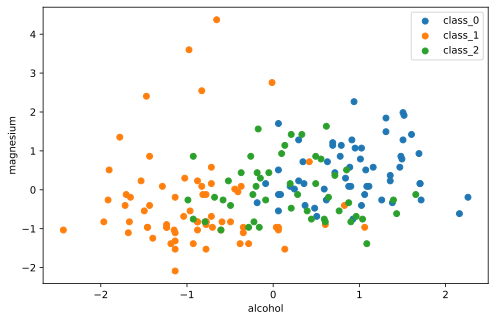

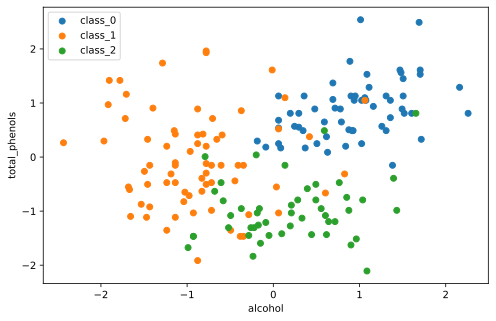

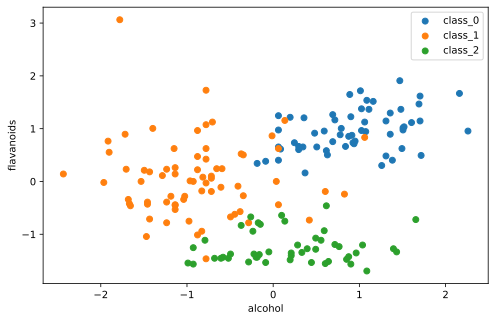

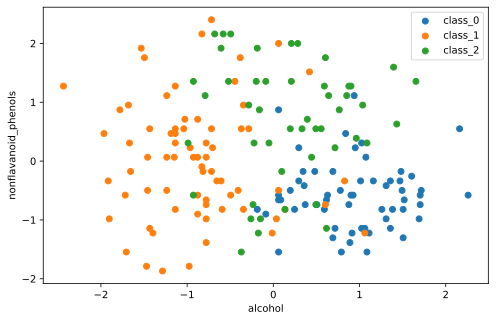

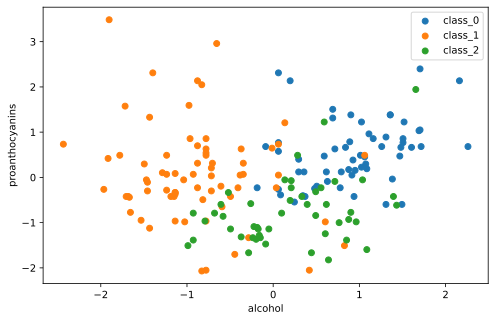

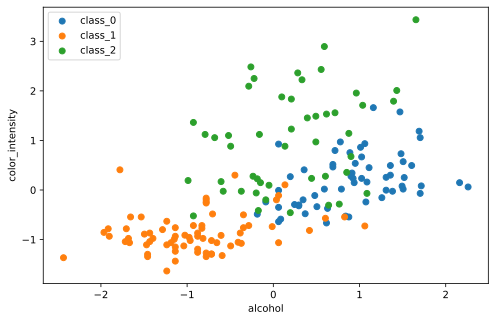

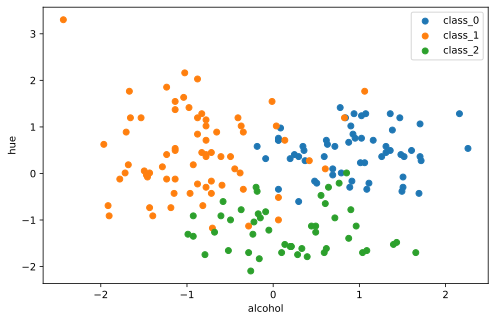

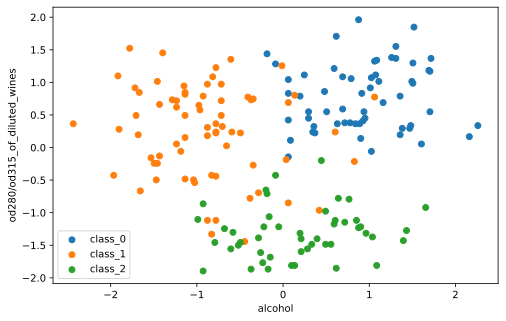

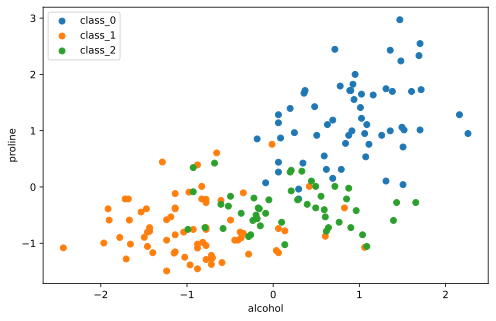

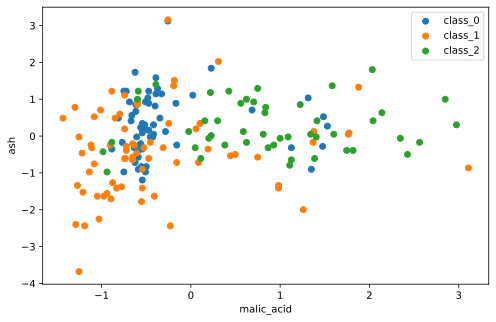

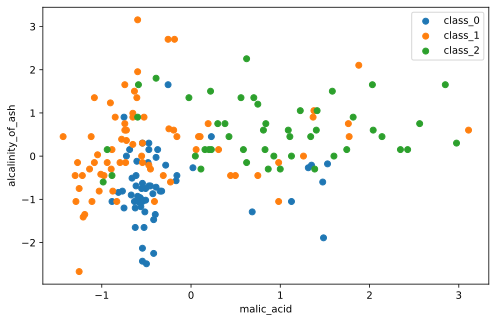

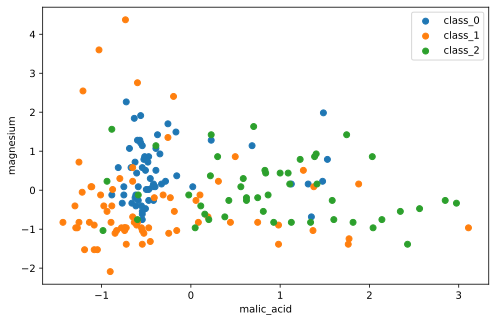

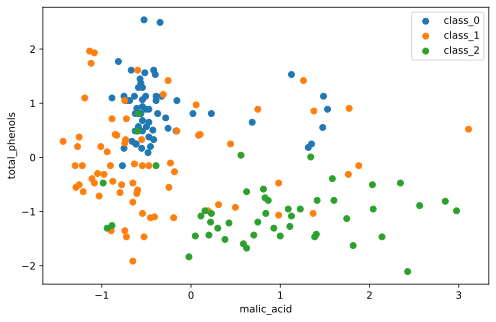

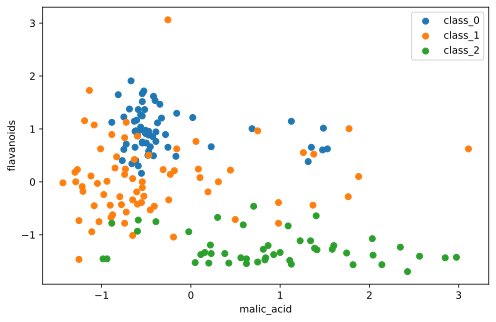

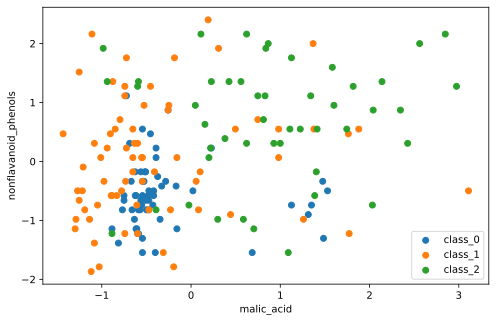

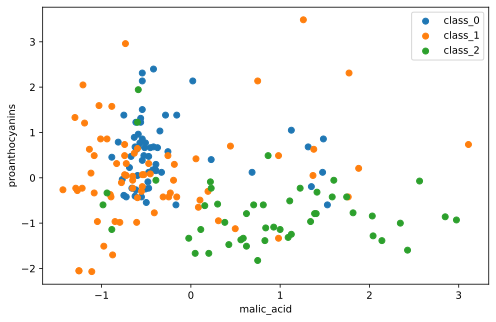

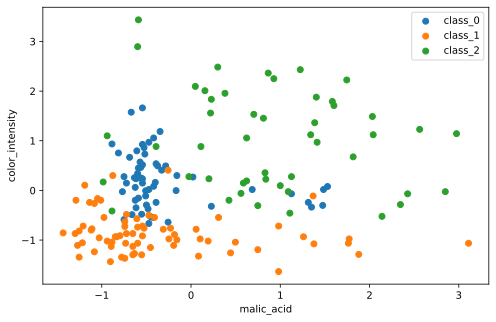

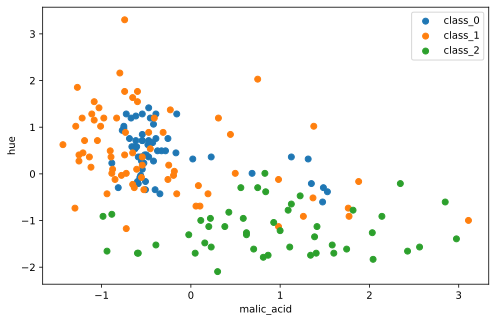

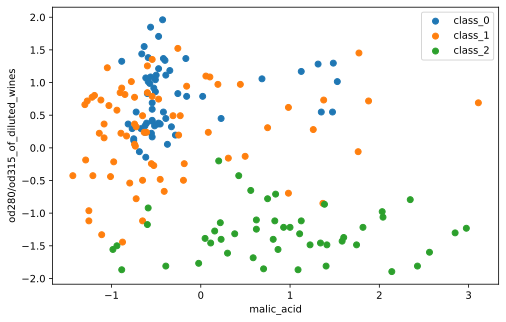

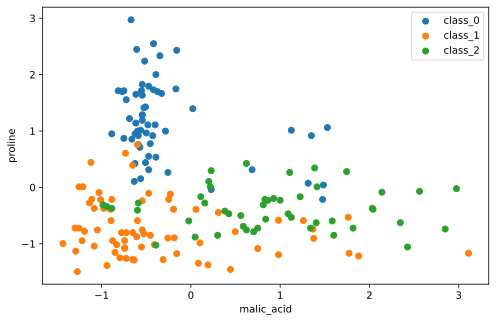

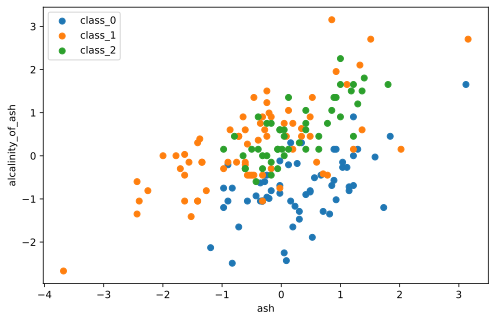

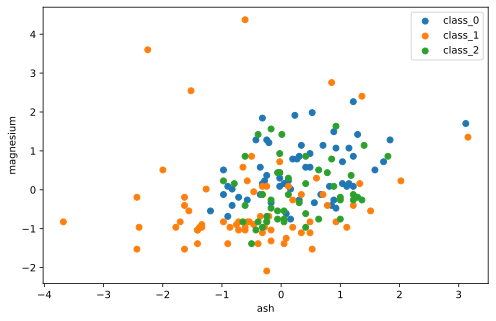

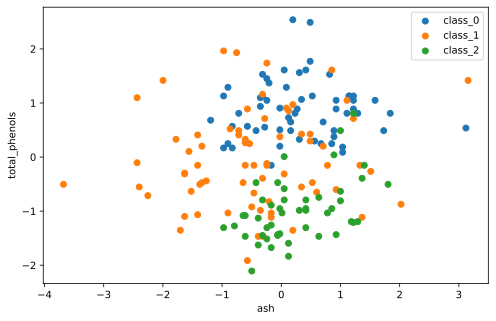

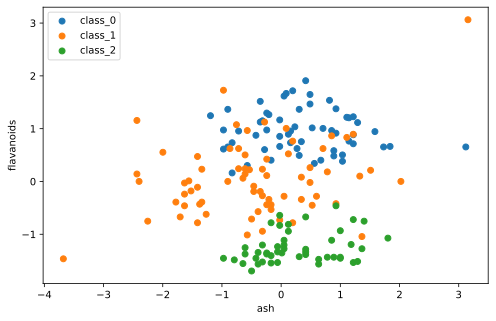

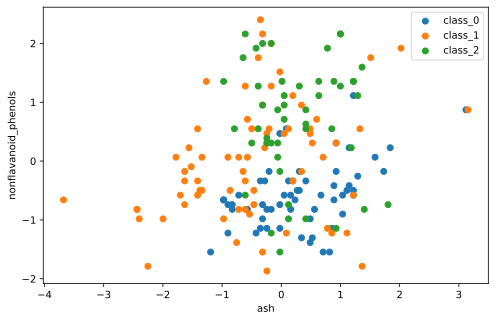

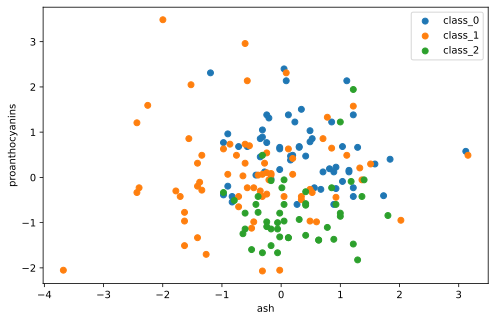

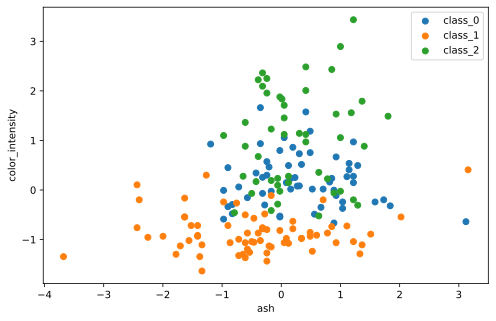

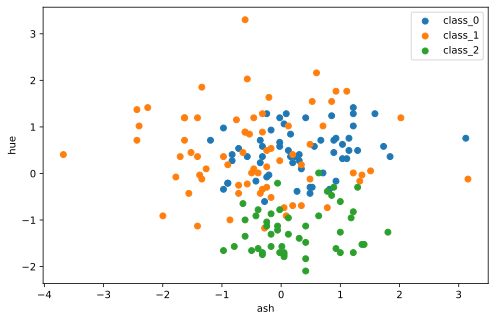

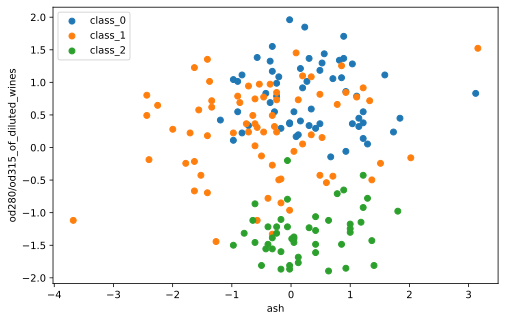

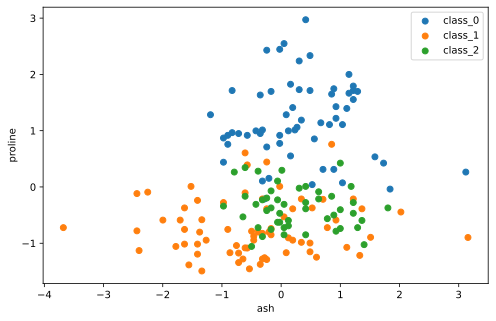

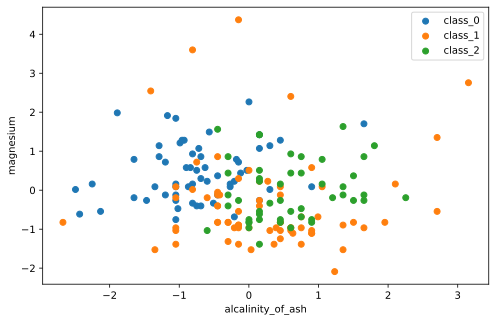

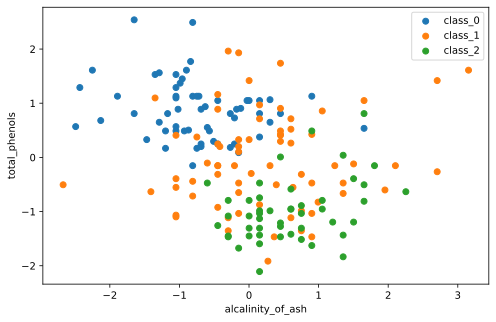

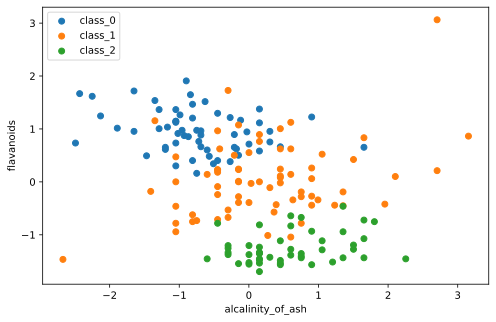

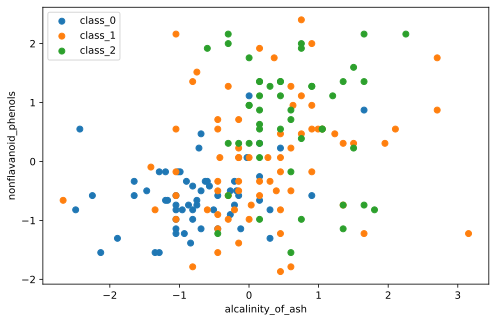

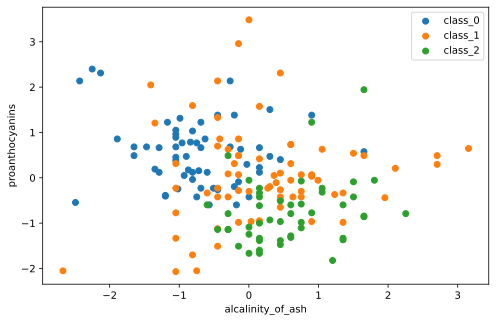

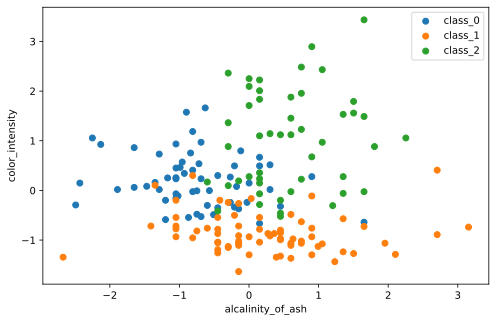

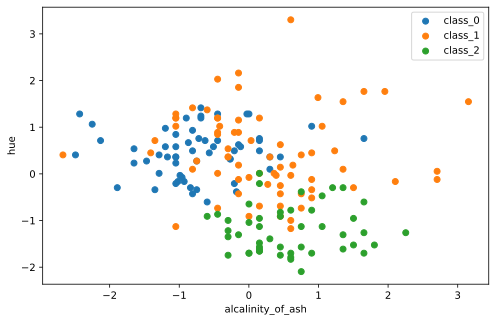

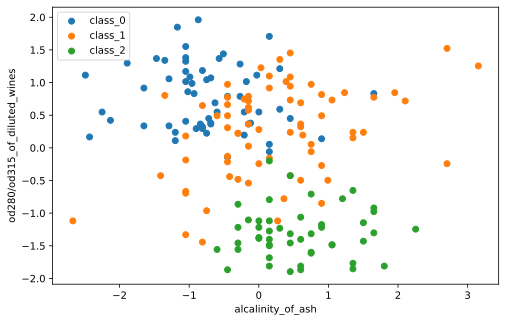

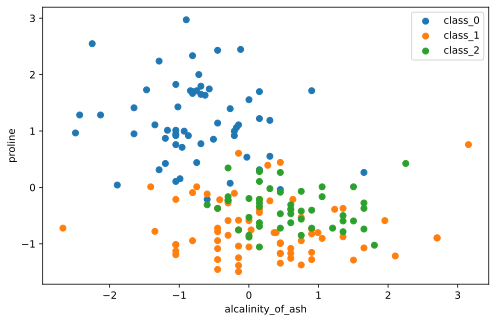

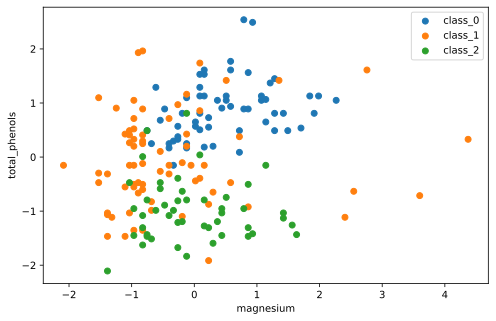

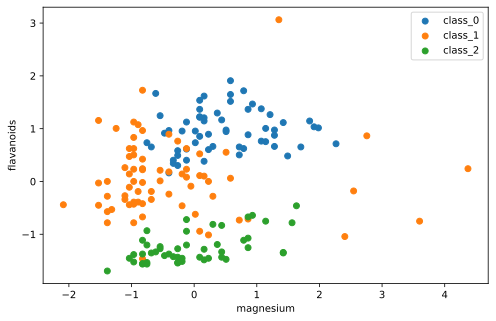

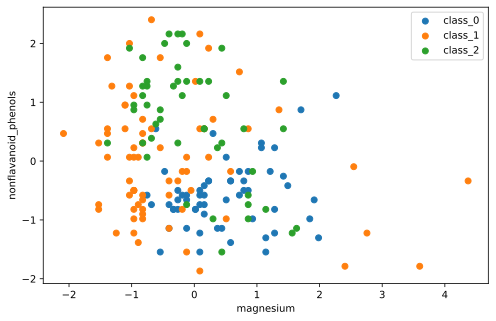

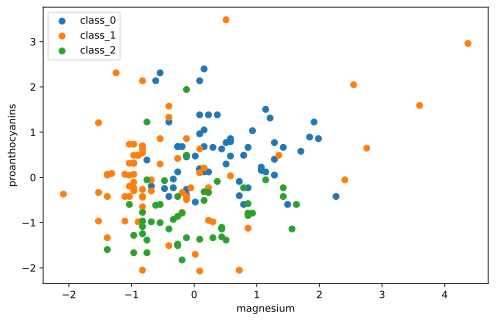

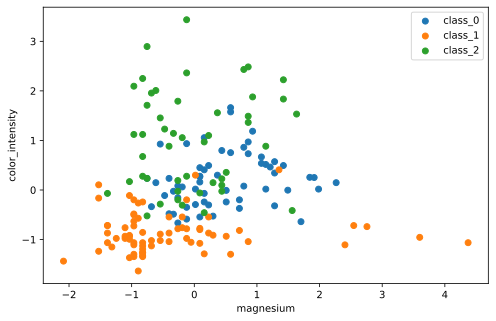

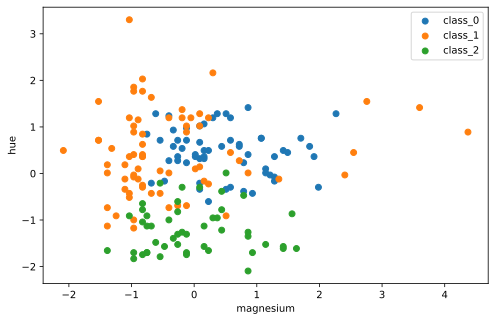

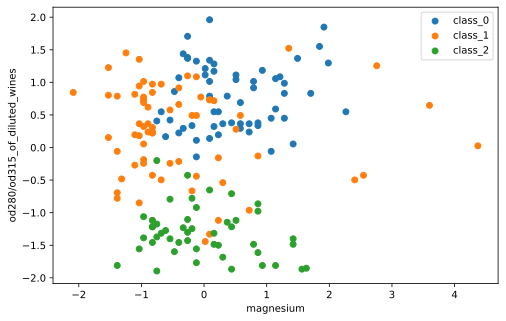

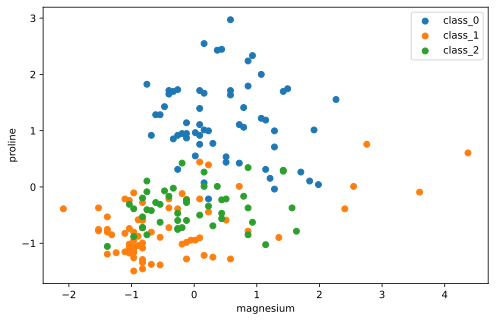

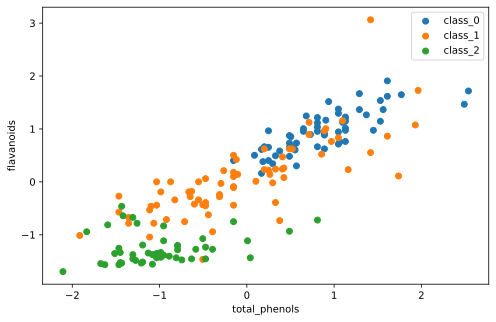

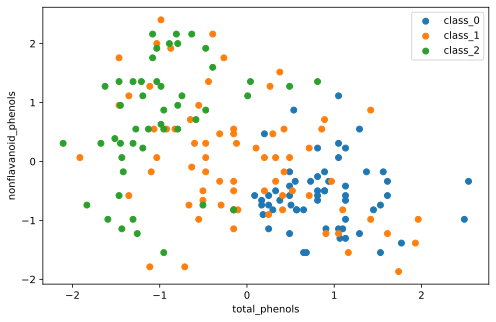

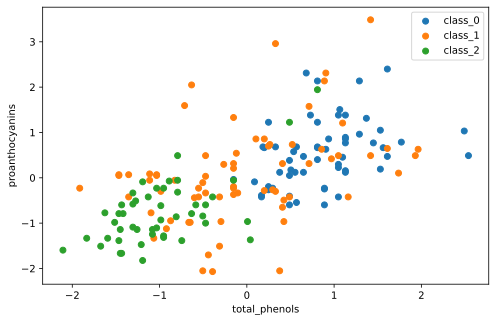

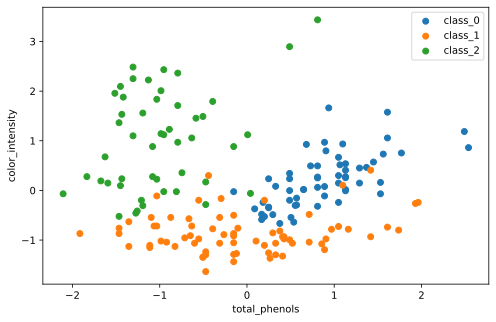

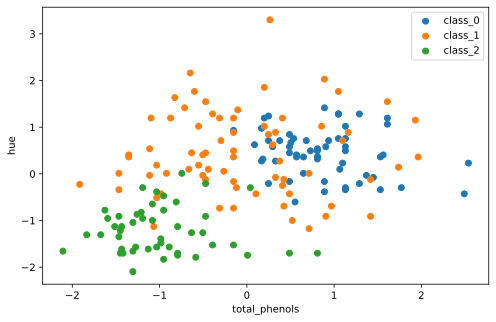

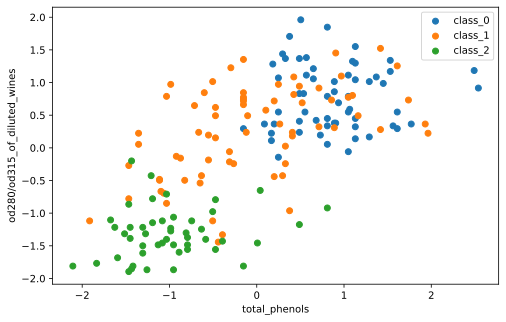

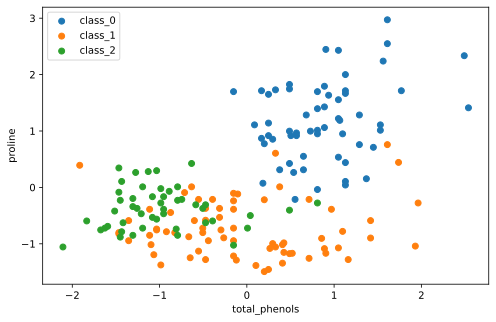

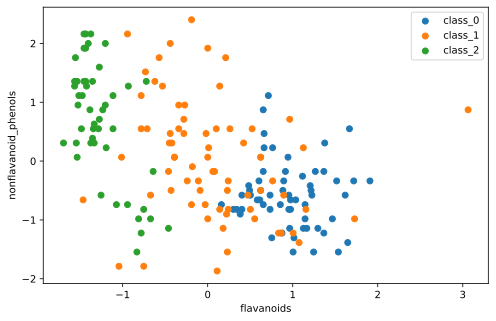

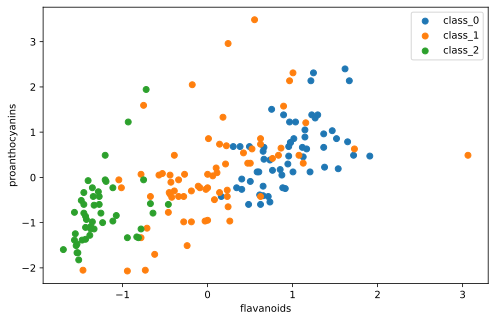

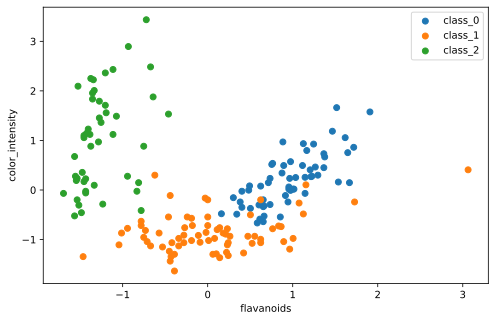

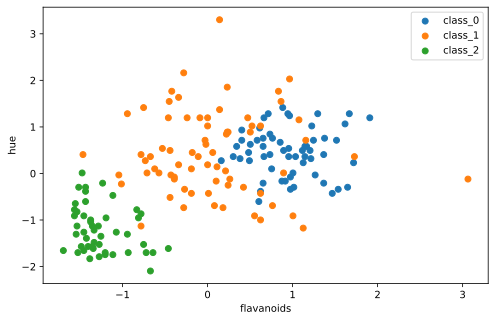

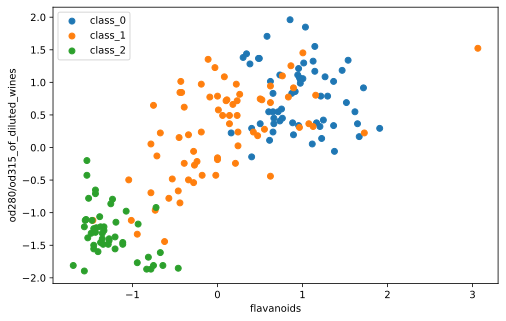

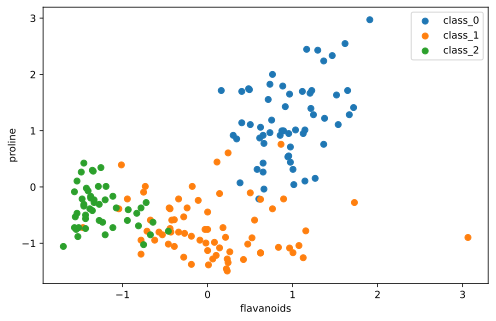

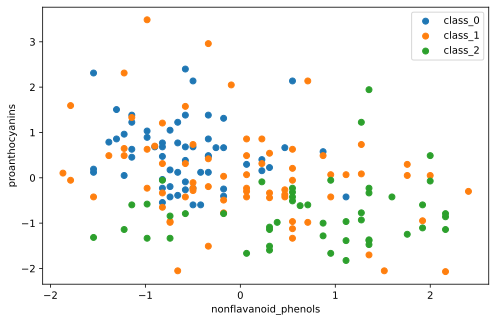

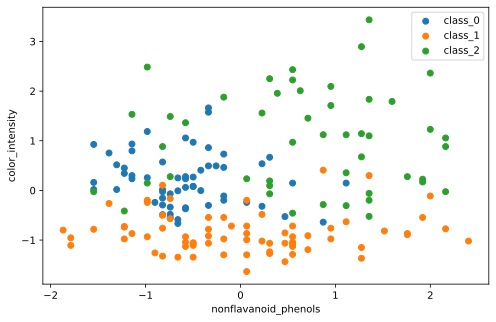

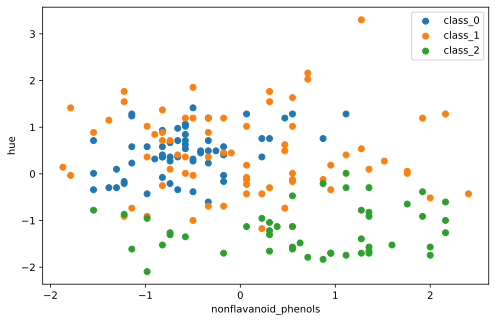

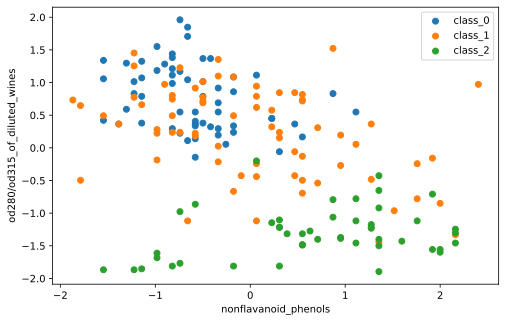

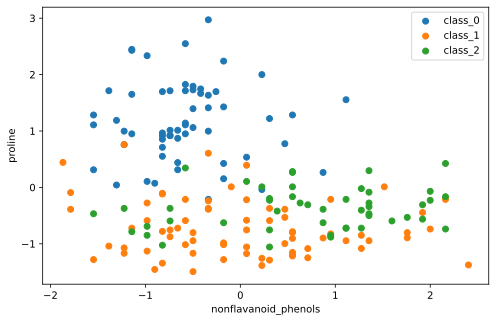

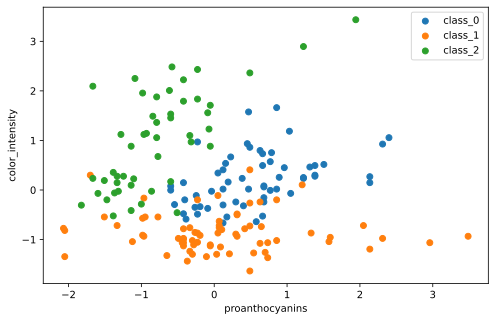

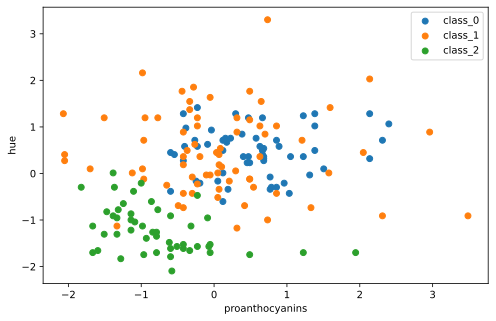

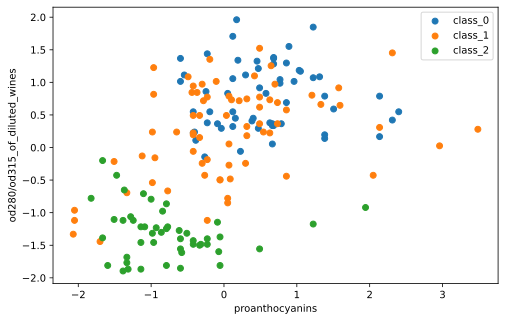

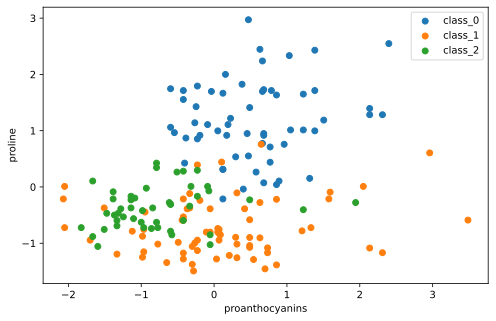

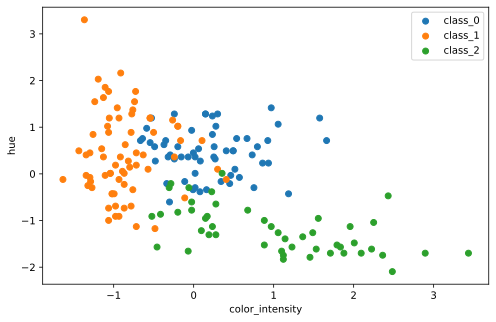

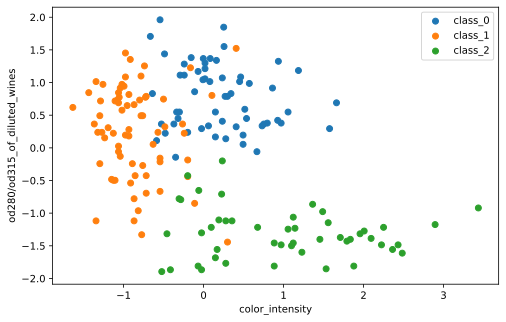

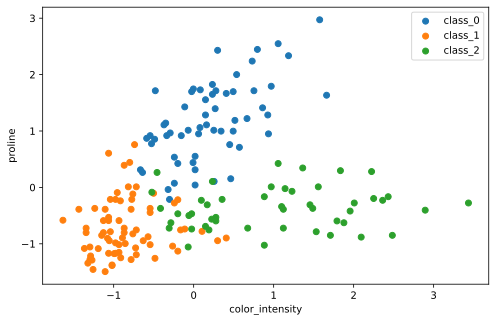

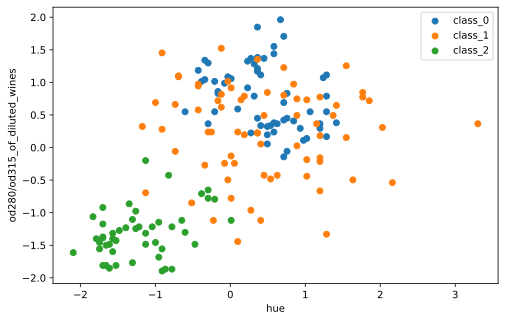

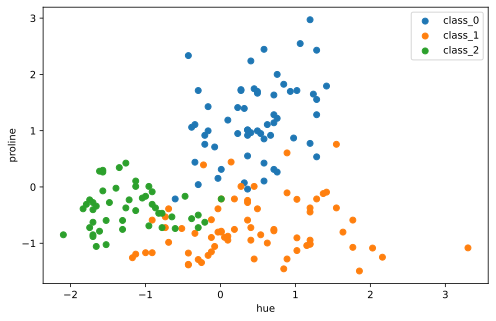

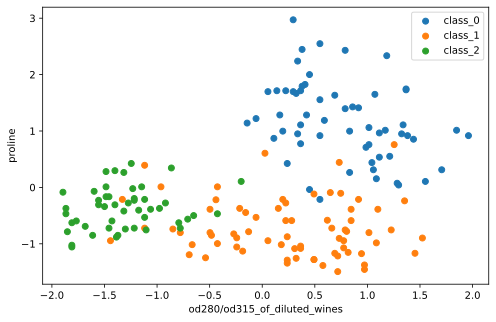

'\nНаиболее информативные графики могут быть те, на которых классы хорошо разделяются. Например, график,\nгде признаки "alcohol" и "malic_acid" разделяют классы наиболее четко, может быть наиболее\nинформативным, так как он позволяет лучше всего различить объекты разных классов.\n'

In [225]:
# ваш код здесь
X = datasets.load_wine()["data"]
feature_names = datasets.load_wine()["feature_names"]
target = datasets.load_wine()["target"]
target_names = datasets.load_wine()["target_names"]
X_scaled = scale(X)

cnt_graphs = 0
# 4, 6; 6, 8; 8, 10
# for x in range(10, 12):
#     for y in range(x + 1, 13):
#         if (x == 10) and (y == 13):
#             continue
#         cnt_graphs += 1
#         ax = plt.subplot(2, 2, cnt_graphs)
#         for k in range(len(target_names)):
#             ax.scatter(X_scaled[target == k, x],
#                        X_scaled[target == k, y], label=target_names[k])
#             plt.xlabel(feature_names[x])
#             plt.ylabel(feature_names[y])
#             plt.legend()

for x in range(12):
    for y in range(x + 1, 13):
        for k in range(len(target_names)):
            plt.scatter(X_scaled[target == k, x],
                       X_scaled[target == k, y], label=target_names[k])
            plt.xlabel(feature_names[x])
            plt.ylabel(feature_names[y])
            plt.legend()
        plt.show()

# plt.tight_layout()
# plt.show()

"""
Наиболее информативные графики могут быть те, на которых классы хорошо разделяются. Например, график,
где признаки "alcohol" и "malic_acid" разделяют классы наиболее четко, может быть наиболее
информативным, так как он позволяет лучше всего различить объекты разных классов.
"""

**Задание 9.** Реализуйте функцию, вычисляющую коэффициенты линейной регрессии $a_1$ и $a_0$ для зависимости вида $y_i(x)=a_1 x_i + a_0$. Для этого обратитесь к материалу второй лекции курса, где был разобран подобный пример. На вход функция должна принимать два вектора $x$ и $y$. Результат работы должен представлять два значения коэффициентов $a_1$ и $a_0$.

In [213]:
# ваш код здесь
# def linear_regression(x, y):
#     X = np.vstack([x, np.ones(len(x))]).T
#     a1, a0 = np.linalg.lstsq(X, y)[0]
#     return a1, a0

def linear_regression(x, y):
    n = len(x)
    sumX = np.sum(x)
    sumY = np.sum(y)
    sumXY = np.sum(x * y)
    sumXSquared = np.sum(x**2)

    a1 = (n * sumXY - sumX * sumY) / (n * sumXSquared - sumX**2)
    a0 = (sumY - a1 * sumX) / n
    return a1, a0


x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 5, 7, 11])
a1, a0 = linear_regression(x, y)
print(f"Коэффициент линейной регрессии a1 = {a1}\nКоэффициент линейной регрессии a0 = {a0}")

Коэффициент линейной регрессии a1 = 2.2
Коэффициент линейной регрессии a0 = -1.0


**Задание 10.** Примените функцию из предыдущего пункта для предсказания того, как прогрессирует диабет у пациентов из набора данных `"Diabetes dataset"`[https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset ] Для этого загрузите этот набор. В качестве $x$ используйте значения признака индекса массы тела (`bmi`), в качестве $y$ - значения по ключу `target`. Вычислите коэффициенты $a_1$ и $a_0$. Постройте график с осью абсцисс, отвечающей за значения `bmi`, осью ординат со значениями `target`. В виде 442 точек нанесите примеры из загруженных данных, в виде прямой представьте предсказания модели. Подпишите оси координат и метки значений на осях

Коэффициент линейной регрессии a1 = 949.4352603840385
Коэффициент линейной регрессии a0 = 152.13348416289614


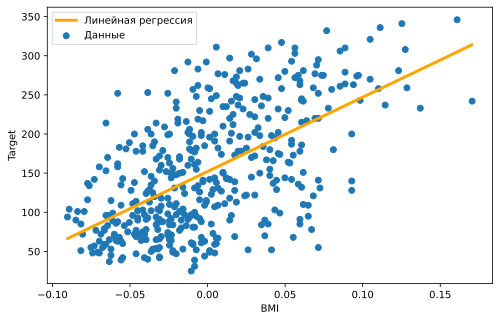

In [212]:
# ваш код здесь
X = datasets.load_diabetes()["data"][:, np.newaxis, 2]  # bmi
y = datasets.load_diabetes()["target"]

x = X.flatten()

a1, a0 = linear_regression(x, y)

print(
    f"Коэффициент линейной регрессии a1 = {a1}\nКоэффициент линейной регрессии a0 = {a0}")

# Построение графика
plt.scatter(x, y, label='Данные')
plt.plot(x, a1 * x + a0, color='orange',
         linewidth=3, label='Линейная регрессия')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.legend()
plt.show()